In [100]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

In [101]:
file = ('C:\\Users\\mjjyo\\OneDrive\\Desktop\\openavenuesmicrointernship\\open_ave_data.csv')
file = pd.read_csv(file)

In [102]:
file.dropna()

,Unnamed: 0,ReportText,findings,clinicaldata,ExamName,impression
0,0,EXAM: CHEST RADIOGRAPHY EXAM DATE: 06/01/2019 ...,FINDINGS: Lungs/Pleura: No focal opacities evi...,CLINICAL HISTORY: Cough. \n\n,EXAM: CHEST RADIOGRAPHY EXAM DATE: 06/01/2019 ...,IMPRESSION: Normal 2-view chest radiography.
1,1,EXAM: CHEST RADIOGRAPHY EXAM DATE: 05/23/2020 ...,FINDINGS: Lungs/Pleura: No focal opacities evi...,CLINICAL HISTORY: CHEST PAIN. \n\n,EXAM: CHEST RADIOGRAPHY EXAM DATE: 05/23/2020 ...,IMPRESSION: No acute cardiopulmonary abnormali...
2,2,EXAM: CHEST RADIOGRAPHY EXAM DATE: 12/13/2019 ...,FINDINGS: Lungs/Pleura: No focal opacities evi...,CLINICAL HISTORY: CHEST PAIN. \n\n,EXAM: CHEST RADIOGRAPHY EXAM DATE: 12/13/2019 ...,IMPRESSION: No acute cardiopulmonary process.
3,3,Exam: - CHEST-PORTABLE History: Chest pain Com...,Findings: Heart size appears normal. Lungs cle...,History: Chest pain \n\n,Exam: - CHEST-PORTABLE\n\nComparison: None,Impression: Lungs clear
4,4,EXAM: CHEST RADIOGRAPHY EXAM DATE: 06/17/2021 ...,FINDINGS: Lungs/Pleura: No focal opacities evi...,"CLINICAL HISTORY: CHEST PAIN, SHORTNESS OF BRE...",EXAM: CHEST RADIOGRAPHY EXAM DATE: 06/17/2021 ...,IMPRESSION: Normal single view chest.
...,...,...,...,...,...,...
949,982,CHEST RADIOGRAPH: PA and Lateral views HISTORY...,LUNGS: The lung fields demonstrate normal degr...,HISTORY: R05 Cough \n\n,CHEST RADIOGRAPH: PA and Lateral views\n\nCOMP...,IMPRESSION: No acute pulmonary disease.
950,983,EXAM DESCRIPTION: X-ray single view chest. CLI...,FINDINGS: The lungs are well expanded and are ...,"CLINICAL HISTORY: 68 years Male, SOB \n\n",EXAM DESCRIPTION: X-ray single view chest.\n\n...,IMPRESSION: No evidence of acute intrathoracic...
951,984,EXAM: CHEST RADIOGRAPHY EXAM DATE: 04/02/2018 ...,FINDINGS: Lungs/Pleura: No focal opacities evi...,CLINICAL HISTORY: Chest pain. \n\n,EXAM: CHEST RADIOGRAPHY EXAM DATE: 04/02/2018 ...,IMPRESSION: Normal single view chest.
952,985,EXAM: XR CHEST 1 VW HISTORY: chest pain TECHNI...,FINDINGS: Lines and tubes: None Cardiomediasti...,HISTORY: chest pain \n\n,EXAM: XR CHEST 1 VW\n\nTECHNIQUE: Chest AP vie...,IMPRESSION: No acute cardiopulmonary process D...


In [103]:
#files to do idf on
exam_names = file['ExamName'].dropna().tolist()
print(len(exam_names))

impressions= file['impression'].dropna().tolist()
print(len(impressions))

findings = file['findings'].dropna().tolist()
print(len(findings))

clinical_data = file['clinicaldata'].dropna().tolist()
print(len(clinical_data))



954
954
954
950


In [104]:
#list of corpus
corpus = exam_names + impressions + findings + clinical_data


In [105]:

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names_out()

array(['00', '01', '02', ..., 'your', 'zip', 'zone'], dtype=object)

In [106]:
print(X.shape)

(3812, 1083)


In [107]:
print(X.todense())

[[0.         0.32614224 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [108]:
X.toarray()

array([[0.        , 0.32614224, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [109]:
import numpy as np

In [110]:
from sklearn.manifold import TSNE

In [111]:
import matplotlib.pyplot as plt

In [112]:

X_embedded = TSNE(n_components = 2, learning_rate='auto', init='random', perplexity=3).fit_transform(X)
    


In [113]:
X_embedded

array([[-53.136494, -16.427057],
       [-73.37543 , -26.126307],
       [-61.50919 , -22.148573],
       ...,
       [-14.720051, -39.439224],
       [ 36.82493 , -49.525463],
       [ 23.91133 , -97.24984 ]], dtype=float32)

In [114]:
def color_func(count):
    if 954 >= count > 0:
        return ('blue', 'Exam Name')
    elif 1908 >= count > 954:
        return ('red', 'Impression')
    elif 2862 >= count > 1908:
        return ('green', 'Findings')
    elif 3812 >= count > 2862:
        return ('yellow', 'Clinical Data')

    

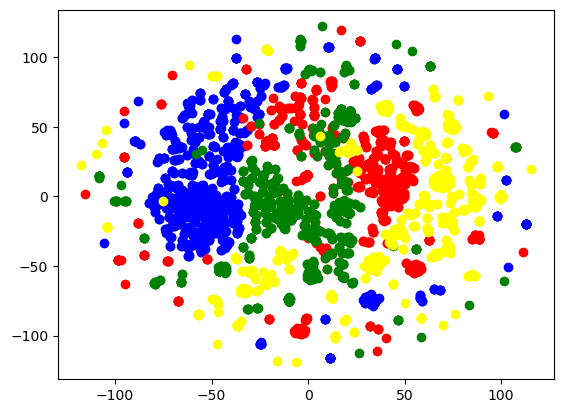

In [115]:
num = 1
for i in X_embedded:
    color, name = color_func(num)
    plt.scatter(i[0], i[1], c = color, label = name)
    num += 1
# plt.legend()
#issue with legend
#Blue is Exam Name
#Red is Impression
#Green is findings
#Yellow is Clinical Data